# Principal Component Analysis with Cancer Data

In [182]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [183]:
df = pd.read_csv('breast-cancer-wisconsin-data.csv')

In [184]:
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [185]:
df.shape

(699, 11)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [187]:
# All columns have numerical values except Bare Nuclei

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [188]:
df.shape

(699, 11)

In [189]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [190]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

the target varible is distributed in the ratio of 2:1

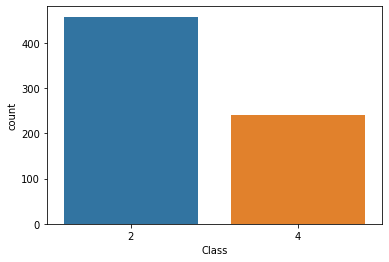

In [191]:
a=sns.countplot(x='Class',data=df)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [192]:
data = df

In [193]:
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [194]:
# We could see "?" values in column, this should be removed or imputed from data set
data = df.replace('?', np.nan)
data = data.apply(lambda x: x.fillna(x.median()),axis=0)
data['Bare Nuclei'] = data['Bare Nuclei'].astype('float64')  
# Check for missing value in any other column
data.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

There are no missing values in the data

In [195]:
data['Bare Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7.,  5.,  8.,  6.])

? is imputed with the median

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null float64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


the column 'Bare Nuclei' has been converted into float64

In [197]:
#checking for duplicate data
data.duplicated(keep='first').sum()

9

we have 9 duplicate observations so lets remove them as it is very less data

In [198]:
data.drop_duplicates(keep = 'first', inplace = True)

In [199]:
data.shape

(690, 11)

In [200]:
# Id columns is to identify rows hence can be skipped in analysis
data = data.drop('ID', axis=1)

In [201]:
data.shape

(690, 10)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [202]:
# Check for correlation of variable
data.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947
Class,0.716812,0.817586,0.817551,0.701175,0.681063,0.816655,0.756736,0.715363,0.423947,1.000000


In [203]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\Users\swathi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\swathi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


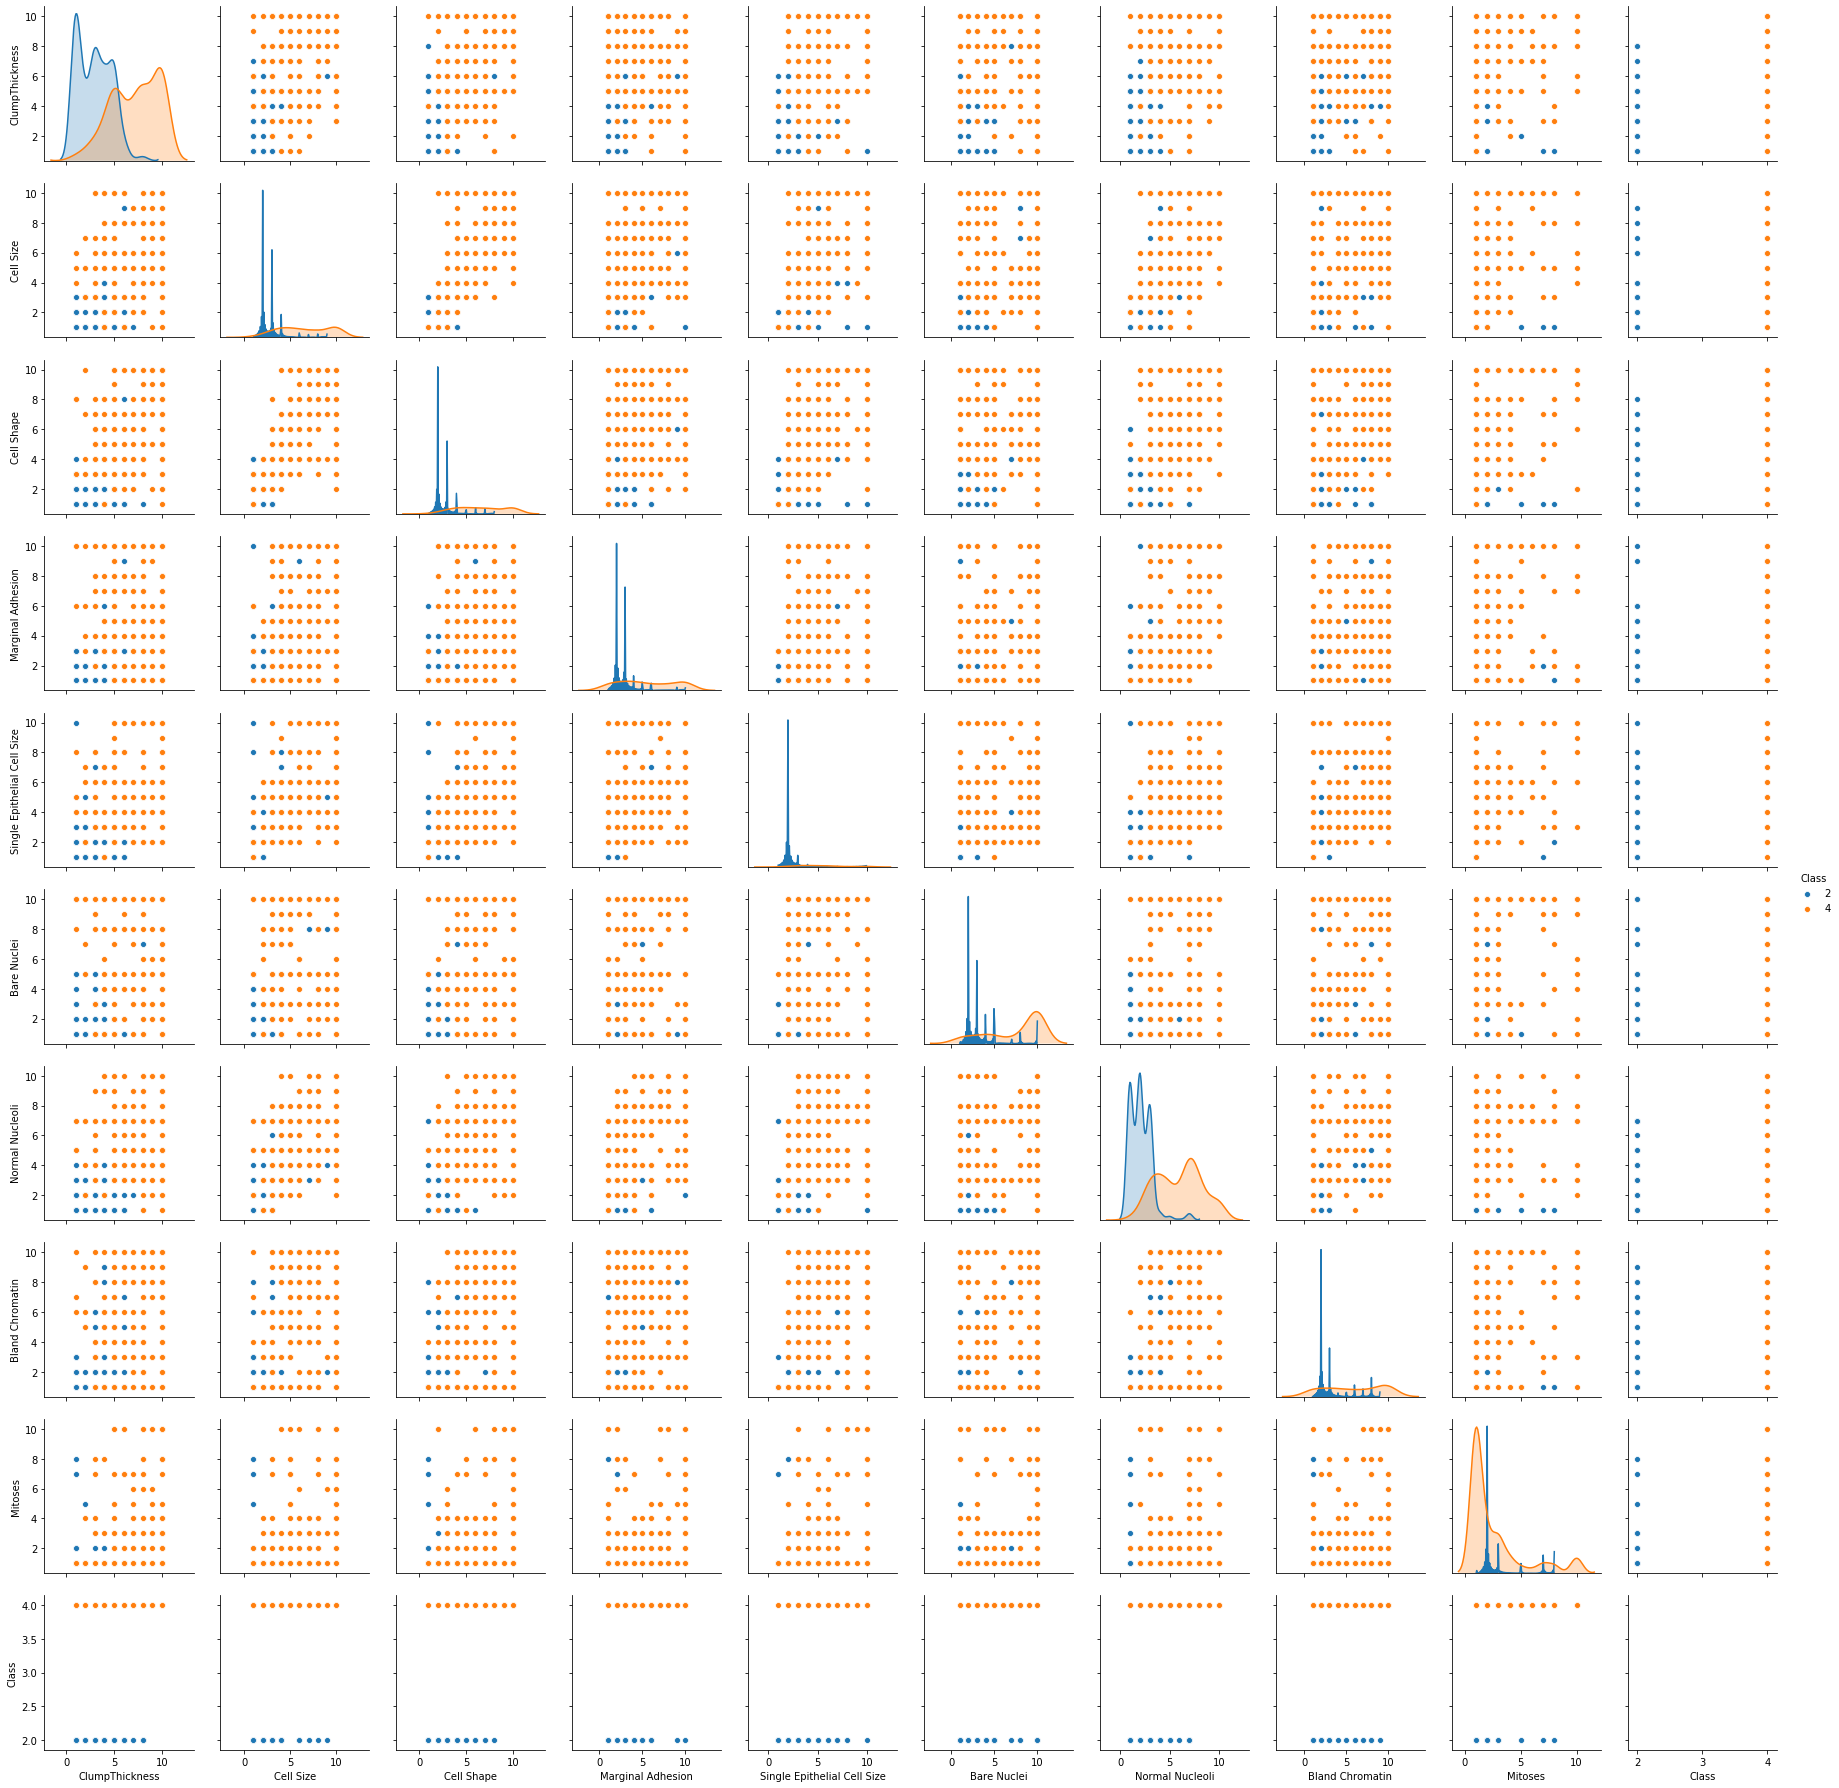

In [204]:
#Let us check for pair plots
sns.pairplot(data, hue='Class')

In [205]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

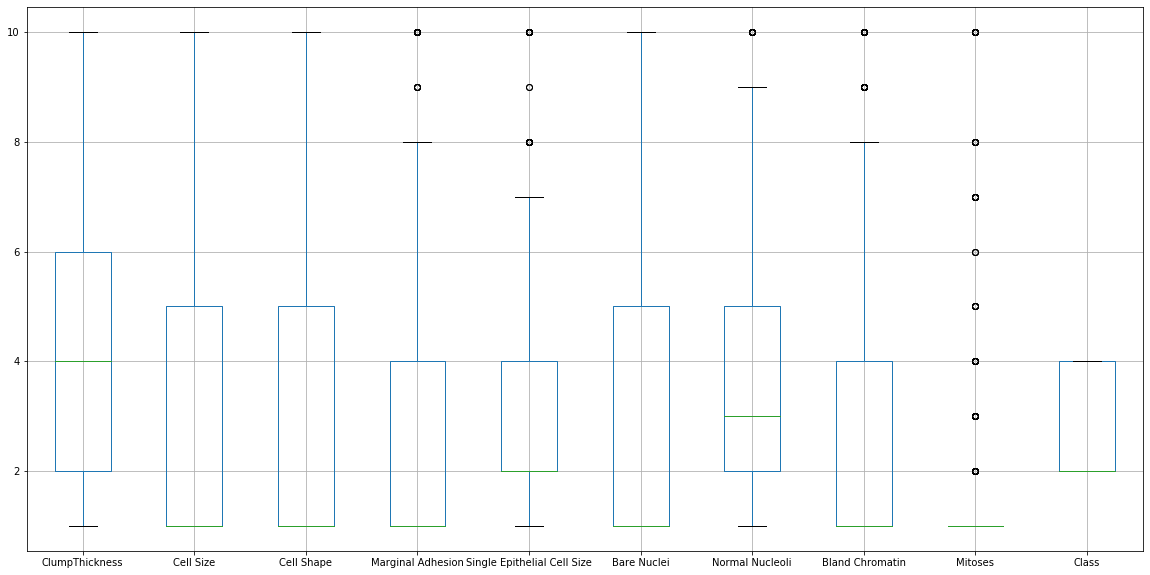

In [206]:
data.boxplot(figsize=(20,10))

As the column 'Mitoses' contains so many outliers, dropping the column

In [207]:
data = data.drop('Mitoses', axis=1)

data set has outliers so lets remove them

In [208]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(546, 9)

In [209]:
# We could see most of the outliers are now removed.

In [210]:
# Class would be the target variable. Should be removed when PCA is done
y = data['Class']

In [211]:
data = data.drop('Class', axis=1)
x = data

In [212]:
# lets standerdize the data
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

# Q6 Create a covariance matrix for identifying Principal components

In [213]:
# PCA
# Step 1 - Create covariance matrix
cov = np.cov(data.T)
cov

array([[1.00183486, 0.59674237, 0.60489895, 0.43953786, 0.44763872,
        0.56432752, 0.47417442, 0.49453031],
       [0.59674237, 1.00183486, 0.89333215, 0.66892038, 0.66403783,
        0.7306096 , 0.66291259, 0.68185359],
       [0.60489895, 0.89333215, 1.00183486, 0.62379119, 0.64418074,
        0.72473462, 0.63431419, 0.64414626],
       [0.43953786, 0.66892038, 0.62379119, 1.00183486, 0.56304951,
        0.67715374, 0.56683674, 0.56274923],
       [0.44763872, 0.66403783, 0.64418074, 0.56304951, 1.00183486,
        0.64668488, 0.54461931, 0.58415628],
       [0.56432752, 0.7306096 , 0.72473462, 0.67715374, 0.64668488,
        1.00183486, 0.65955232, 0.59054697],
       [0.47417442, 0.66291259, 0.63431419, 0.56683674, 0.54461931,
        0.65955232, 1.00183486, 0.60513888],
       [0.49453031, 0.68185359, 0.64414626, 0.56274923, 0.58415628,
        0.59054697, 0.60513888, 1.00183486]])

# Q7 Identify eigen values and eigen vector

In [214]:
# Step 2- Get eigen values and eigen vector
import scipy.linalg as la  

In [215]:
eigvals, eigvectors = la.eig(cov)

In [216]:
print("Eigen Values: ")
print(eigvals)
print()
print("Eigen Vectors: ")
print(eigvectors)

Eigen Values: 
[5.3323794 +0.j 0.10431995+0.j 0.6076923 +0.j 0.26346603+0.j
 0.46759831+0.j 0.4592904 +0.j 0.37983966+0.j 0.40009287+0.j]

Eigen Vectors: 
[[ 0.30296616 -0.01271208  0.86178767  0.15276981  0.09321504 -0.04781938
   0.36173247  0.0143937 ]
 [ 0.39494258 -0.73856271  0.04523017  0.11906833  0.03782261  0.09493059
  -0.51517621  0.08045838]
 [ 0.38643633  0.66651645  0.11932772  0.04562675  0.07361435  0.1294707
  -0.60632312  0.01710025]
 [ 0.33902541  0.07069762 -0.35352674  0.31175243  0.47977305 -0.39470516
   0.23477444  0.46561734]
 [ 0.33836657  0.01465845 -0.2778367   0.2256417   0.14852117  0.70050059
   0.35188826 -0.3472763 ]
 [ 0.37311262 -0.04455269 -0.06518495 -0.82048839  0.27670098 -0.17596539
   0.1031846  -0.25135122]
 [ 0.34186514  0.03009056 -0.16140274  0.28250071 -0.48290537 -0.50982062
   0.05804238 -0.52903848]
 [ 0.3426133   0.0448992  -0.0925355  -0.24349682 -0.64996892  0.18591586
   0.20773781  0.55907725]]


# Q8 Find variance and cumulative variance by each eigen vector

In [217]:
total = sum(eigvals)
explained_variance = [ (i/total) * 100 for i in sorted(eigvals, reverse = True)]

In [218]:
explained_variance

[(66.53266419578601+0j),
 (7.582241341694057+0j),
 (5.834273785003415+0j),
 (5.730615059717511+0j),
 (4.9920011777522255+0j),
 (4.739299751102416+0j),
 (3.2872936114448024+0j),
 (1.3016110774995526+0j)]

In [219]:
np.cumsum(explained_variance)

array([ 66.5326642 +0.j,  74.11490554+0.j,  79.94917932+0.j,
        85.67979438+0.j,  90.67179556+0.j,  95.41109531+0.j,
        98.69838892+0.j, 100.        +0.j])

C:\Users\swathi\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


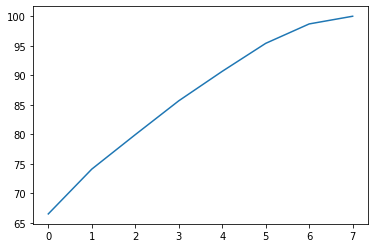

In [220]:
plt.plot(np.cumsum(explained_variance))

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

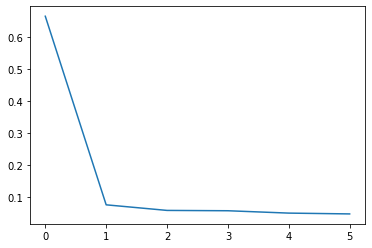

In [221]:
pca=PCA(n_components=6)
pca.fit_transform(data)
plt.plot(pca.explained_variance_ratio_)

In [222]:
pca.components_

array([[ 0.30296616,  0.39494258,  0.38643633,  0.33902541,  0.33836657,
         0.37311262,  0.34186514,  0.3426133 ],
       [-0.86178767, -0.04523017, -0.11932772,  0.35352674,  0.2778367 ,
         0.06518495,  0.16140274,  0.0925355 ],
       [-0.09321504, -0.03782261, -0.07361435, -0.47977305, -0.14852117,
        -0.27670098,  0.48290537,  0.64996892],
       [-0.04781938,  0.09493059,  0.1294707 , -0.39470516,  0.70050059,
        -0.17596539, -0.50982062,  0.18591586],
       [-0.0143937 , -0.08045838, -0.01710025, -0.46561734,  0.3472763 ,
         0.25135122,  0.52903848, -0.55907725],
       [ 0.36173247, -0.51517621, -0.60632312,  0.23477444,  0.35188826,
         0.1031846 ,  0.05804238,  0.20773781]])

In [223]:
pca.explained_variance_ratio_

array([0.66532664, 0.07582241, 0.05834274, 0.05730615, 0.04992001,
       0.047393  ])

# Q10 Find correlation between components and features

In [224]:
temp= pd.DataFrame(pca.components_ , columns=x.columns)
#print(X.columns)
#comp = pd.DataFrame(data=pca.components_,columns=X.columns)
temp.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin
0,0.302966,0.394943,0.386436,0.339025,0.338367,0.373113,0.341865,0.342613
1,-0.861788,-0.045230,-0.119328,0.353527,0.277837,0.065185,0.161403,0.092536
2,-0.093215,-0.037823,-0.073614,-0.479773,-0.148521,-0.276701,0.482905,0.649969
3,-0.047819,0.094931,0.129471,-0.394705,0.700501,-0.175965,-0.509821,0.185916
4,-0.014394,-0.080458,-0.017100,-0.465617,0.347276,0.251351,0.529038,-0.559077


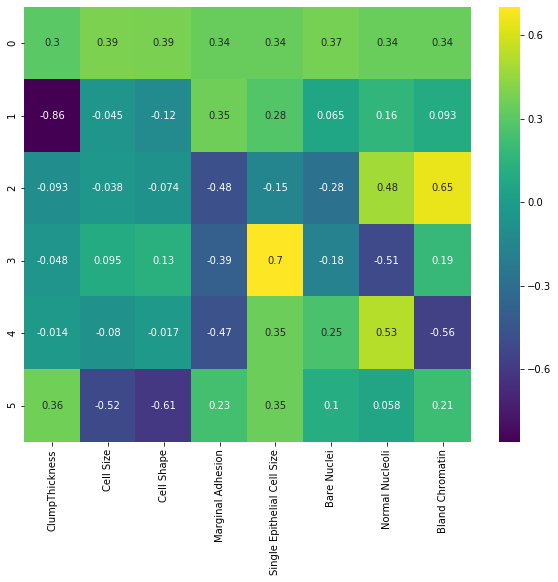

In [225]:
plt.figure(figsize=(10,8))
sns.heatmap(temp, cmap='viridis', annot=True)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [226]:
jokes = pd.read_excel('jokes.xlsx')

In [227]:
jokes.shape

(24983, 101)

In [228]:
jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Create a new dataframe named `ratings`, with only first 200 rows and all columns from 1(first column is 0) of dataset

In [229]:
ratings = jokes.iloc[:200,1:101]

In [230]:
ratings.shape

(200, 100)

In [231]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [232]:
ratings = ratings.replace(99.00, 0)
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 Normalize the ratings using StandardScaler and save them in ratings_diff variable

In [233]:
columns = ratings.columns
ratings_diff = StandardScaler().fit_transform(ratings)

# Q15  Find the mean for each column  in `ratings_diff` i.e, for each joke


In [234]:
mean_ratings = pd.DataFrame(ratings_diff.mean(axis=0), columns)

# Q16 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [235]:
sorted_jokes_df = mean_ratings.sort_values(mean_ratings.columns[0], axis = 0, ascending = False)

In [236]:
top_ten_jokes = sorted_jokes_df.head(10)

In [237]:
print("Top ten joke IDs: ")
top_ten_jokes.index.values.tolist()

Top ten joke IDs: 


['Joke54',
 'Joke21',
 'Joke48',
 'Joke65',
 'Joke50',
 'Joke100',
 'Joke84',
 'Joke74',
 'Joke24',
 'Joke14']